In [5]:
import numpy as num
import math
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

#set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
Pipe3D = fits.open("Pipe3D", memmap=True)

In [7]:
Pipe3D.info()

Filename: Pipe3D
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    330   4656R x 95C   [128A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 128A, J, J]   


In [8]:
print(Pipe3D[1].columns)

ColDefs(
    name = 'mangaid'; format = '128A'
    name = 'objra'; format = 'E'; unit = 'degree'
    name = 'objdec'; format = 'E'; unit = 'degree'
    name = 'redshift'; format = 'E'
    name = 're_arc'; format = 'E'; unit = 'arcsec'
    name = 'pa'; format = 'E'; unit = 'degrees'
    name = 'ellip'; format = 'E'
    name = 'dl'; format = 'E'
    name = 're_kpc'; format = 'E'; unit = 'kpc'
    name = 'log_mass'; format = 'E'; unit = 'log(msun)'
    name = 'e_log_mass'; format = 'E'; unit = 'log(msun)'
    name = 'log_sfr_ha'; format = 'E'; unit = 'log(msun/yr)'
    name = 'e_log_sfr_ha'; format = 'E'; unit = 'log(msun/yr)'
    name = 'log_sfr_ssp'; format = 'E'; unit = 'log(msun/yr)'
    name = 'e_log_sfr_ssp'; format = 'E'; unit = 'log(msun/yr)'
    name = 'log_mass_gas'; format = 'E'; unit = 'log(msun)'
    name = 'e_log_mass_gas'; format = 'E'; unit = 'log(msun)'
    name = 'age_lw_re_fit'; format = 'E'; unit = 'log(yr)'
    name = 'e_age_lw_re_fit'; format = 'E'; unit = 'log(yr)'


In [9]:
Pipe3D_Table = Table(Pipe3D[1].data)

In [10]:
Pipe3D_Table

mangaid,objra,objdec,redshift,re_arc,pa,ellip,dl,re_kpc,log_mass,e_log_mass,log_sfr_ha,e_log_sfr_ha,log_sfr_ssp,e_log_sfr_ssp,log_mass_gas,e_log_mass_gas,age_lw_re_fit,e_age_lw_re_fit,alpha_age_lw_re_fit,e_alpha_age_lw_re_fit,age_mw_re_fit,e_age_mw_re_fit,alpha_age_mw_re_fit,e_alpha_age_mw_re_fit,zh_lw_re_fit,e_zh_lw_re_fit,alpha_zh_lw_re_fit,e_alpha_zh_lw_re_fit,zh_mw_re_fit,e_zh_mw_re_fit,alpha_zh_mw_re_fit,e_alpha_zh_mw_re_fit,av_ssp_re,e_av_ssp_re,av_gas_re,e_av_gas_re,oh_re_fit_o3n2,e_oh_re_fit_o3n2,alpha_oh_re_fit_o3n2,e_alpha_oh_re_fit_o3n2,oh_re_fit_n2,e_oh_re_fit_n2,alpha_oh_re_fit_n2,e_alpha_oh_re_fit_n2,oh_re_fit_ons,e_oh_re_fit_ons,alpha_oh_re_fit_ons,e_alpha_oh_re_fit_ons,oh_re_fit_pyqz,e_oh_re_fit_pyqz,alpha_oh_re_fit_pyqz,e_alpha_oh_re_fit_pyqz,oh_re_fit_t2,e_oh_re_fit_t2,alpha_oh_re_fit_t2,e_alpha_oh_re_fit_t2,oh_re_fit_m08,e_oh_re_fit_m08,alpha_oh_re_fit_m08,e_alpha_oh_re_fit_m08,oh_re_fit_t04,e_oh_re_fit_t04,alpha_oh_re_fit_t04,e_alpha_oh_re_fit_t04,no_re_fit_epm09,e_no_re_fit_epm09,alpha_no_re_fit_epm09,e_alpha_no_re_fit_epm09,no_re_fit_n2s2,e_no_re_fit_n2s2,alpha_no_re_fit_n2s2,e_alpha_no_re_fit_n2s2,log_nii_ha_cen,e_log_nii_ha_cen,log_oiii_hb_cen,e_log_oiii_hb_cen,log_sii_ha_cen,e_log_sii_ha_cen,log_oii_hb_cen,e_log_oii_hb_cen,ew_ha_cen,e_ew_ha_cen,ion_class_cen,sigma_cen,e_sigma_cen,sigma_cen_ha,e_sigma_cen_ha,vel_sigma_re,e_vel_sigma_re,lambda_re,e_lambda_re,plateifu,plate,ifudsgn
str128,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str128,int32,int32
manga-10001-12701,133.3711,57.598427,0.039515216,5.16633,158.2584,0.9089005,169.82077,3.9365368,9.993362,0.09378911,-0.11360164,0.06162829,0.321006,0.0030126863,9.30276,0.23200081,8.627869,0.030078521,-0.04584963,0.03300304,9.638159,0.07926918,0.040035605,0.08697648,-0.22109625,0.015437972,-0.11681557,0.016939,-0.34850442,0.036842354,-0.23933342,0.040424522,0.44457963,0.05640487,0.67660224,0.06749492,8.389801,0.009199213,-0.015966777,0.0077317283,8.388852,0.0055929385,-0.040406123,0.0047007366,8.38345,0.024292018,-0.17692971,0.020416886,8.79137,0.009953575,-0.13061059,0.008365752,8.707489,0.009148997,-0.04548534,0.0076895226,8.505277,0.0133201275,-0.023119316,0.011195262,8.709762,0.017676404,-0.044656843,0.014856613,-0.94510114,0.01739015,-0.13413328,0.014616024,-1.2244614,0.019293755,-0.19656102,0.01621596,-0.5920273,0.024525521,-0.06546027,0.027029455,-0.37301385,0.016863849,0.4405697,0.018996716,-22.32854,1.9747354,-10.0,69.21875,8.31978,10.500083,7.8046036,0.5406162,0.26550058,0.59190524,0.581378,10001-12701,10001,12701
manga-10001-12702,133.68567,57.48025,0.041055806,7.01311,102.3759,0.80141026,178.72545,5.606923,10.108313,0.10324214,-0.6064556,0.06187228,0.1583787,0.0016176149,9.071214,1.183896,9.034336,0.032536954,-0.25130534,0.035700507,9.87485,0.040210534,0.05099766,0.044120185,-0.25836778,0.038935095,-0.027706148,0.042720735,-0.31041998,0.074788965,0.10411369,0.082060665,0.45788527,0.032583896,0.4127637,0.21548133,8.434221,0.013942637,-0.12731175,0.011718467,8.380596,0.022753915,-0.10320888,0.019124145,8.338355,0.04564136,-0.2121915,0.038360517,8.772087,0.044274487,-0.29881537,0.037211694,8.737731,0.022238418,-0.14860973,0.018690882,8.569542,0.020284737,-0.18436702,0.017048858,8.824655,0.04418865,-0.20148614,0.037139546,-0.8891101,0.08696529,-0.37605956,0.07309234,-1.3073639,0.0

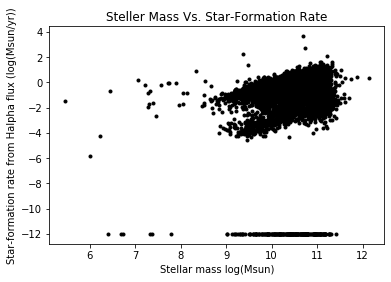

In [16]:
plt.xlabel("Stellar mass log(Msun)")
plt.ylabel("Star-formation rate from Halpha flux (log(Msun/yr))")
plt.title("Steller Mass Vs. Star-Formation Rate")
for i in range(4656):
    SFR = num.array(Pipe3D_Table[i]['log_sfr_ha'])
    SM = num.array(Pipe3D_Table[i]['log_mass'])
    plt.plot(SM, SFR, "k.")
plt.show()